In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## $1.0 Load and plot the event data

Text(0.5, 0.91, 'Event data for all detectors in the 2-6keVee energy range')

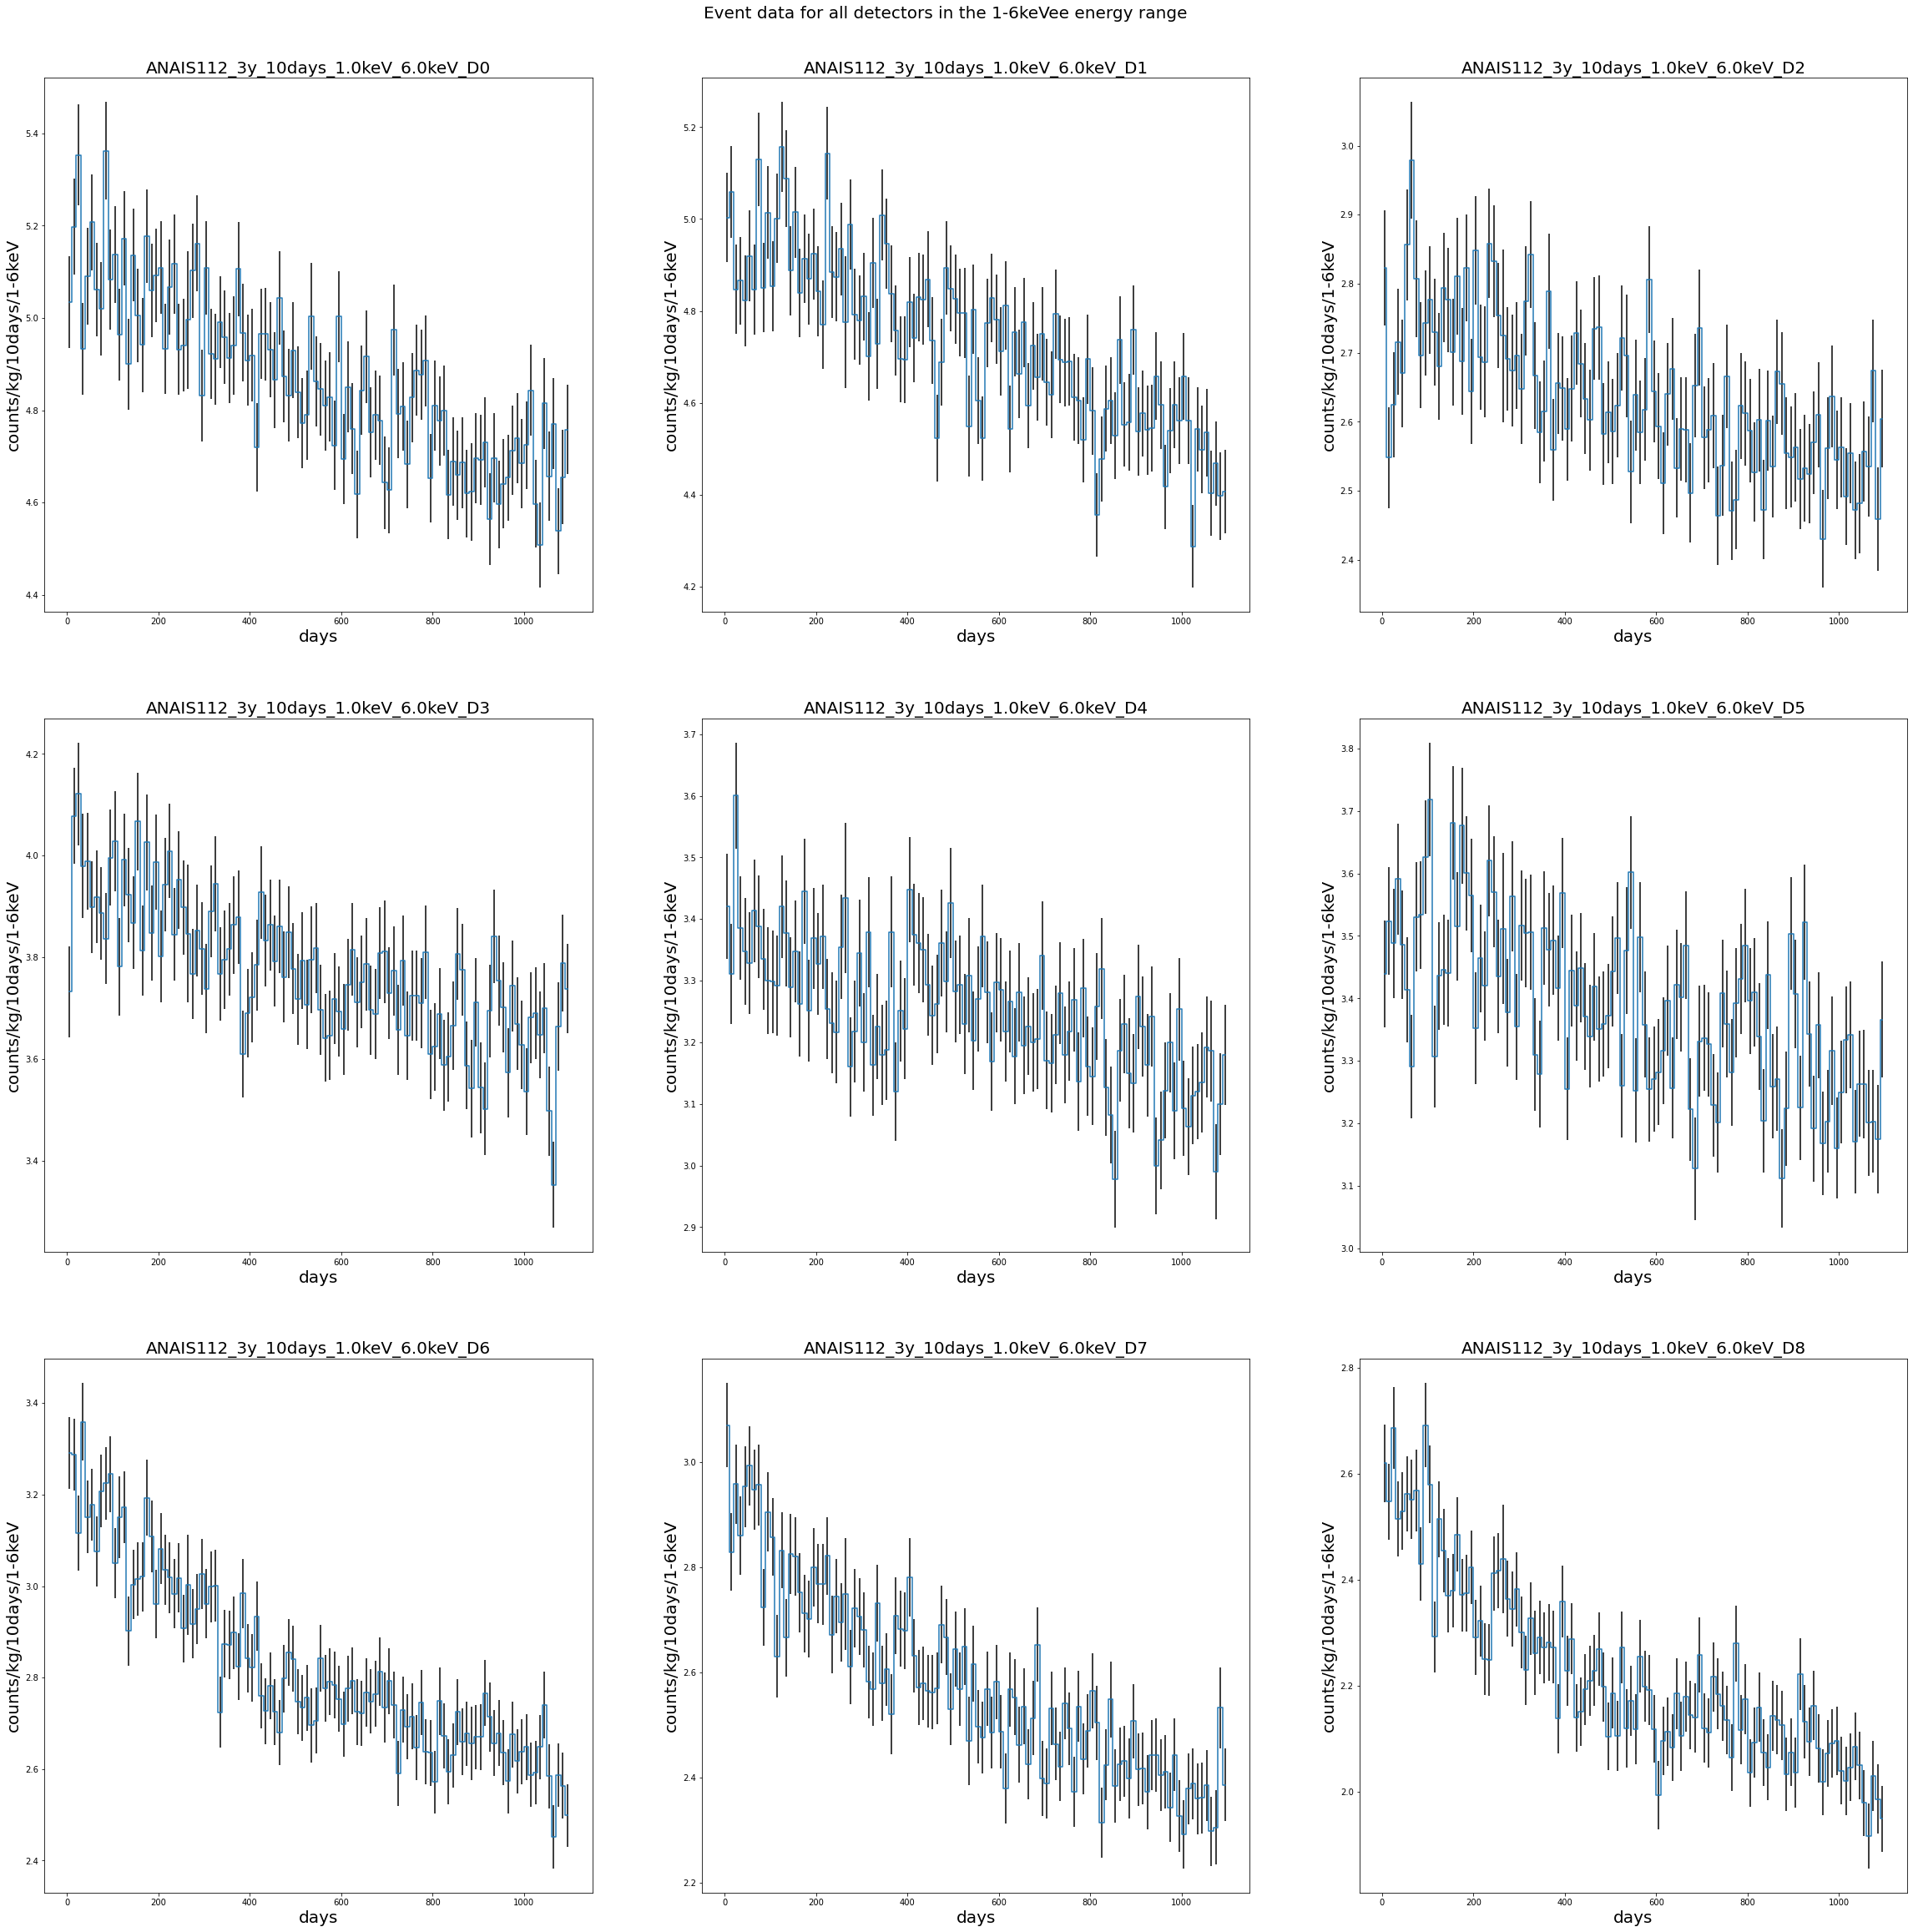

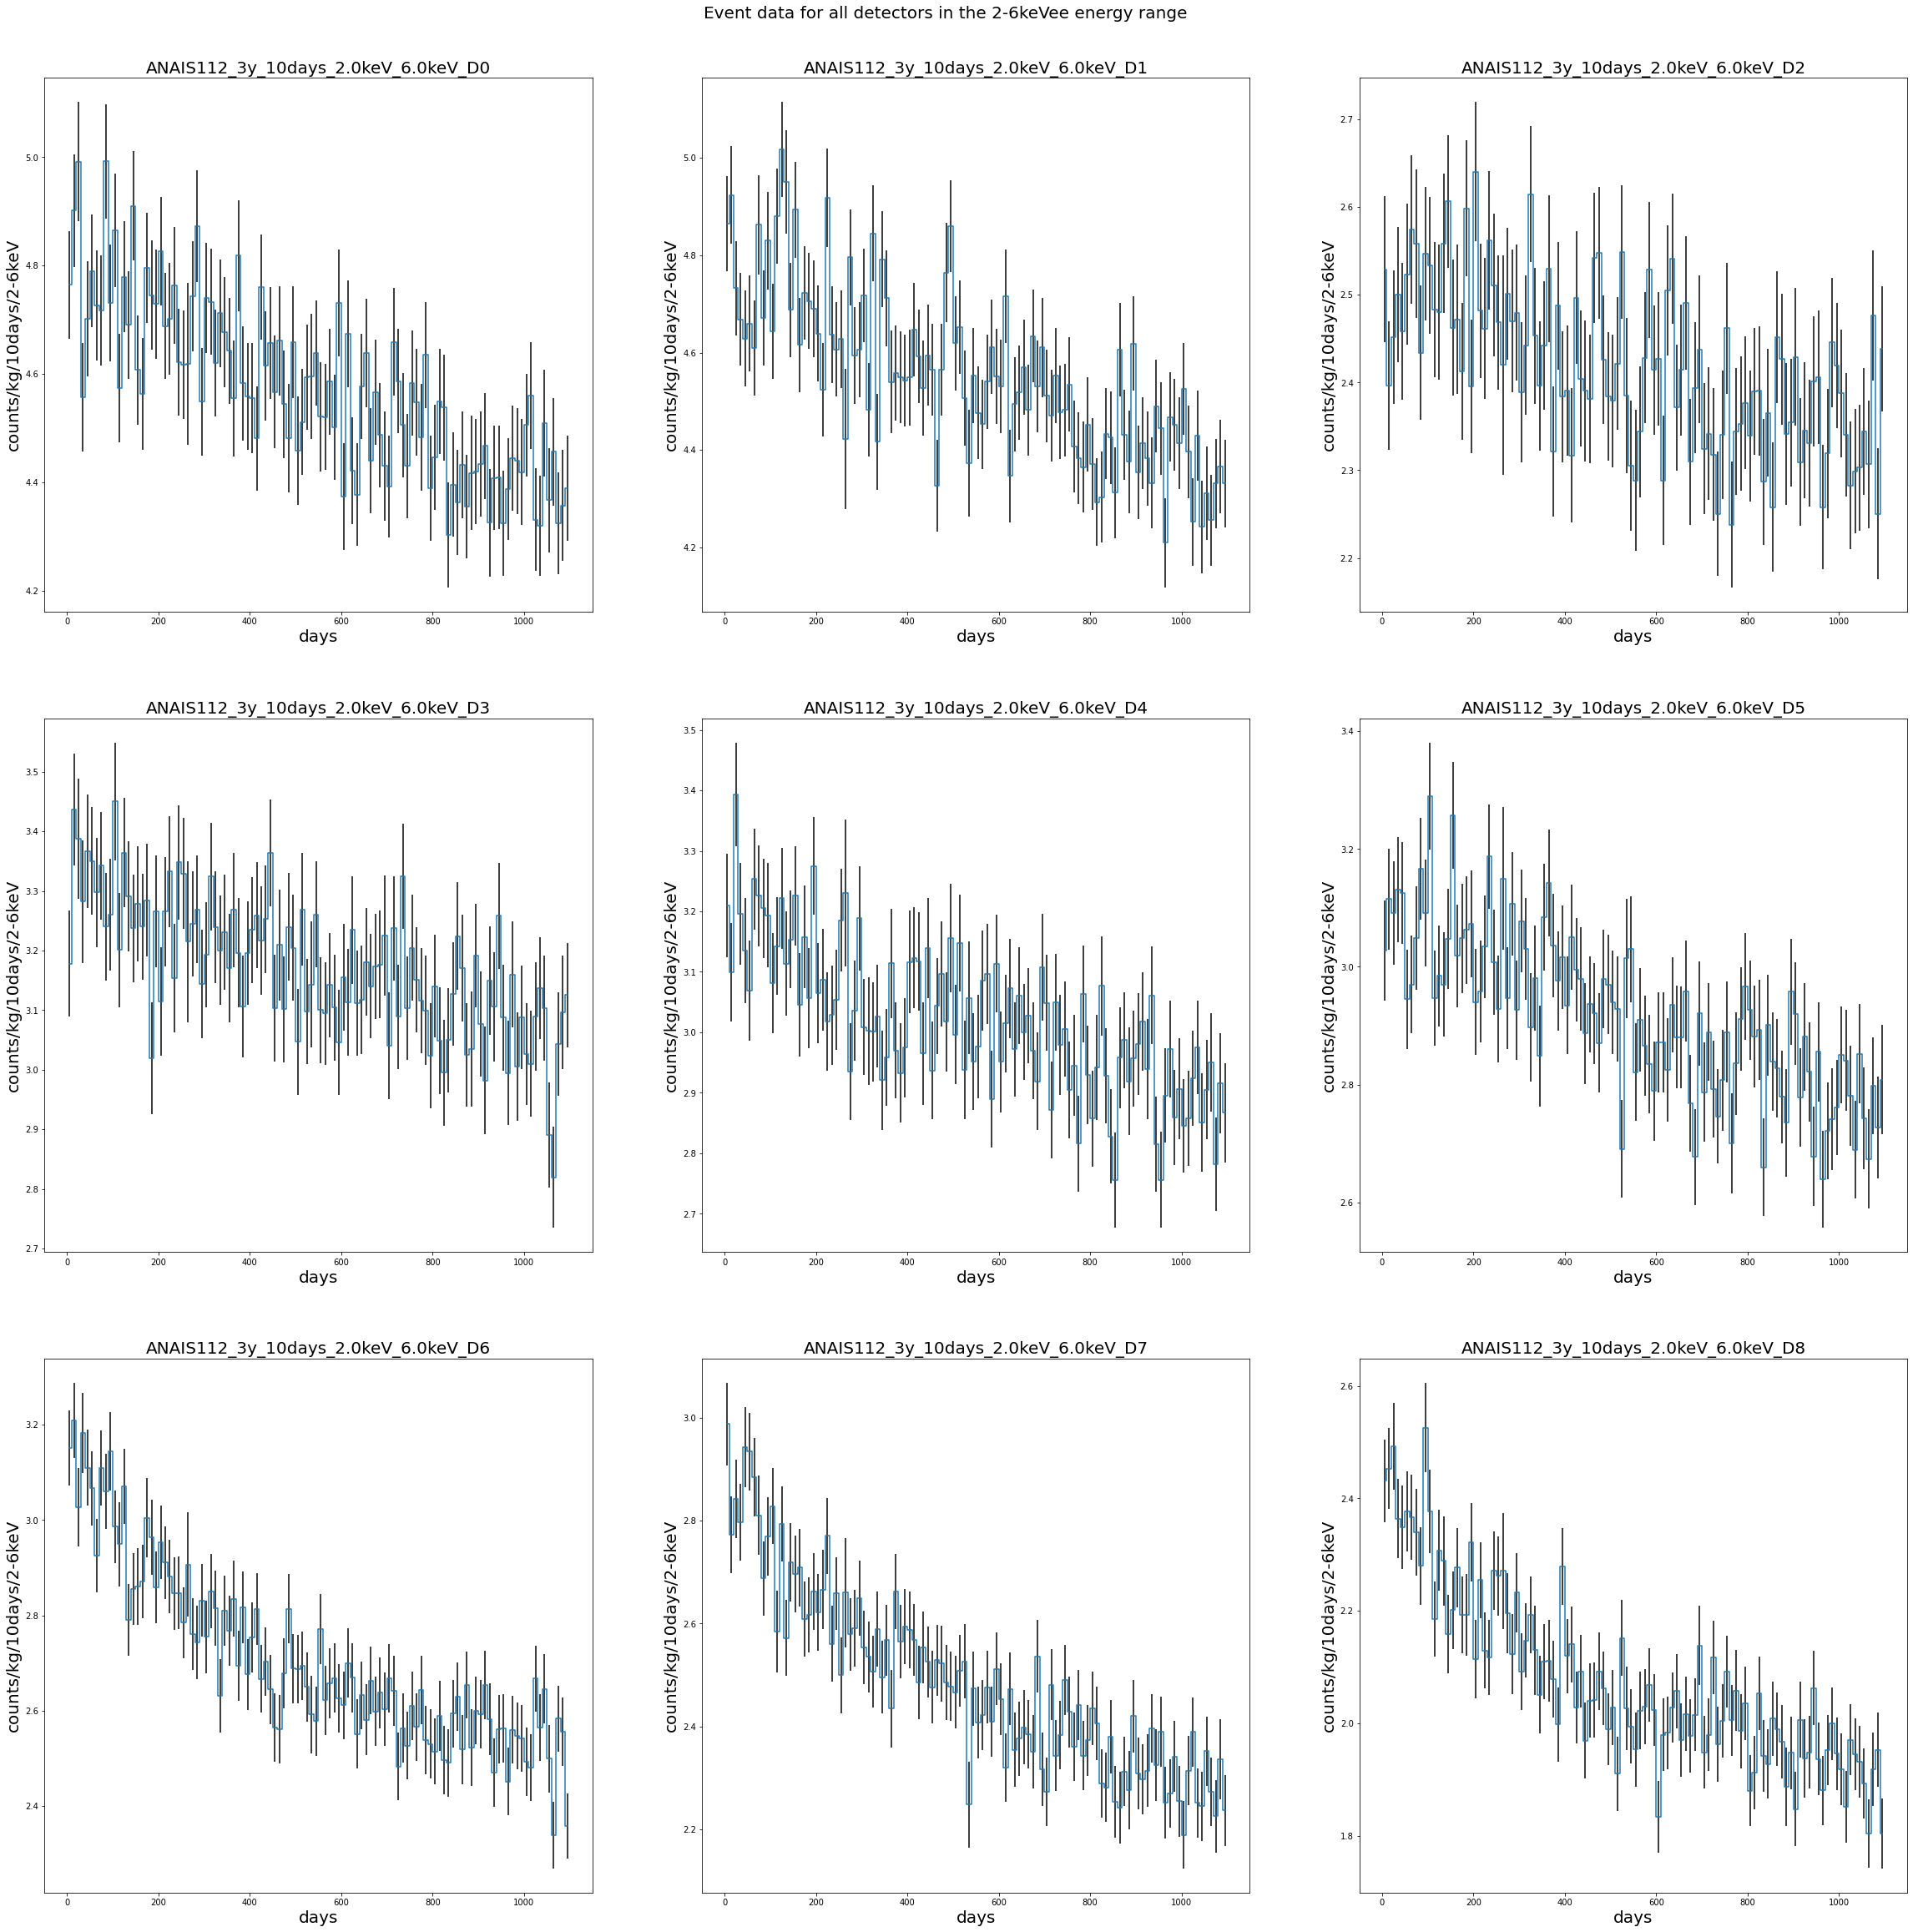

In [3]:
data1_6 = []
data2_6 = []



for i in range(9):
    data1_6.append(np.loadtxt('event_data/ANAIS112_3y_10days_1.0keV_6.0keV_D{}.csv'.format(i), delimiter=','))
    data2_6.append(np.loadtxt('event_data/ANAIS112_3y_10days_2.0keV_6.0keV_D{}.csv'.format(i), delimiter=','))


fig16, ax16 = plt.subplots(3, 3, figsize=(40,40))

for i in range(9):
    ax16[i//3, i%3].errorbar(data1_6[i][:,0], data1_6[i][:,1], yerr = data1_6[i][:,2], ecolor = 'black', drawstyle='steps-mid', label = 'Event data')
    ax16[i//3, i%3].set_xlabel('days', fontsize=20)
    ax16[i//3, i%3].set_ylabel('counts/kg/10days/1-6keV', fontsize=20)
    ax16[i//3, i%3].set_title('ANAIS112_3y_10days_1.0keV_6.0keV_D{}'.format(i), fontsize=20)
    
    
fig16.suptitle('Event data for all detectors in the 1-6keVee energy range', fontsize=20, y=.91 )

fig26, ax26 = plt.subplots(3, 3, figsize=(40,40))

for i in range(9):
    ax26[i//3, i%3].errorbar(data2_6[i][:,0], data2_6[i][:,1], yerr = data1_6[i][:,2], ecolor = 'black', drawstyle='steps-mid')
    ax26[i//3, i%3].set_xlabel('days', fontsize=20)
    ax26[i//3, i%3].set_ylabel('counts/kg/10days/2-6keV', fontsize=20)
    ax26[i//3, i%3].set_title('ANAIS112_3y_10days_2.0keV_6.0keV_D{}'.format(i), fontsize=20)

    
fig26.suptitle('Event data for all detectors in the 2-6keVee energy range', fontsize=20, y=.91 )

## $1.1 Load and plot the simulated background

Text(0.5, 0.91, 'Simulated background for all detectors in the 2-6keVee energy range')

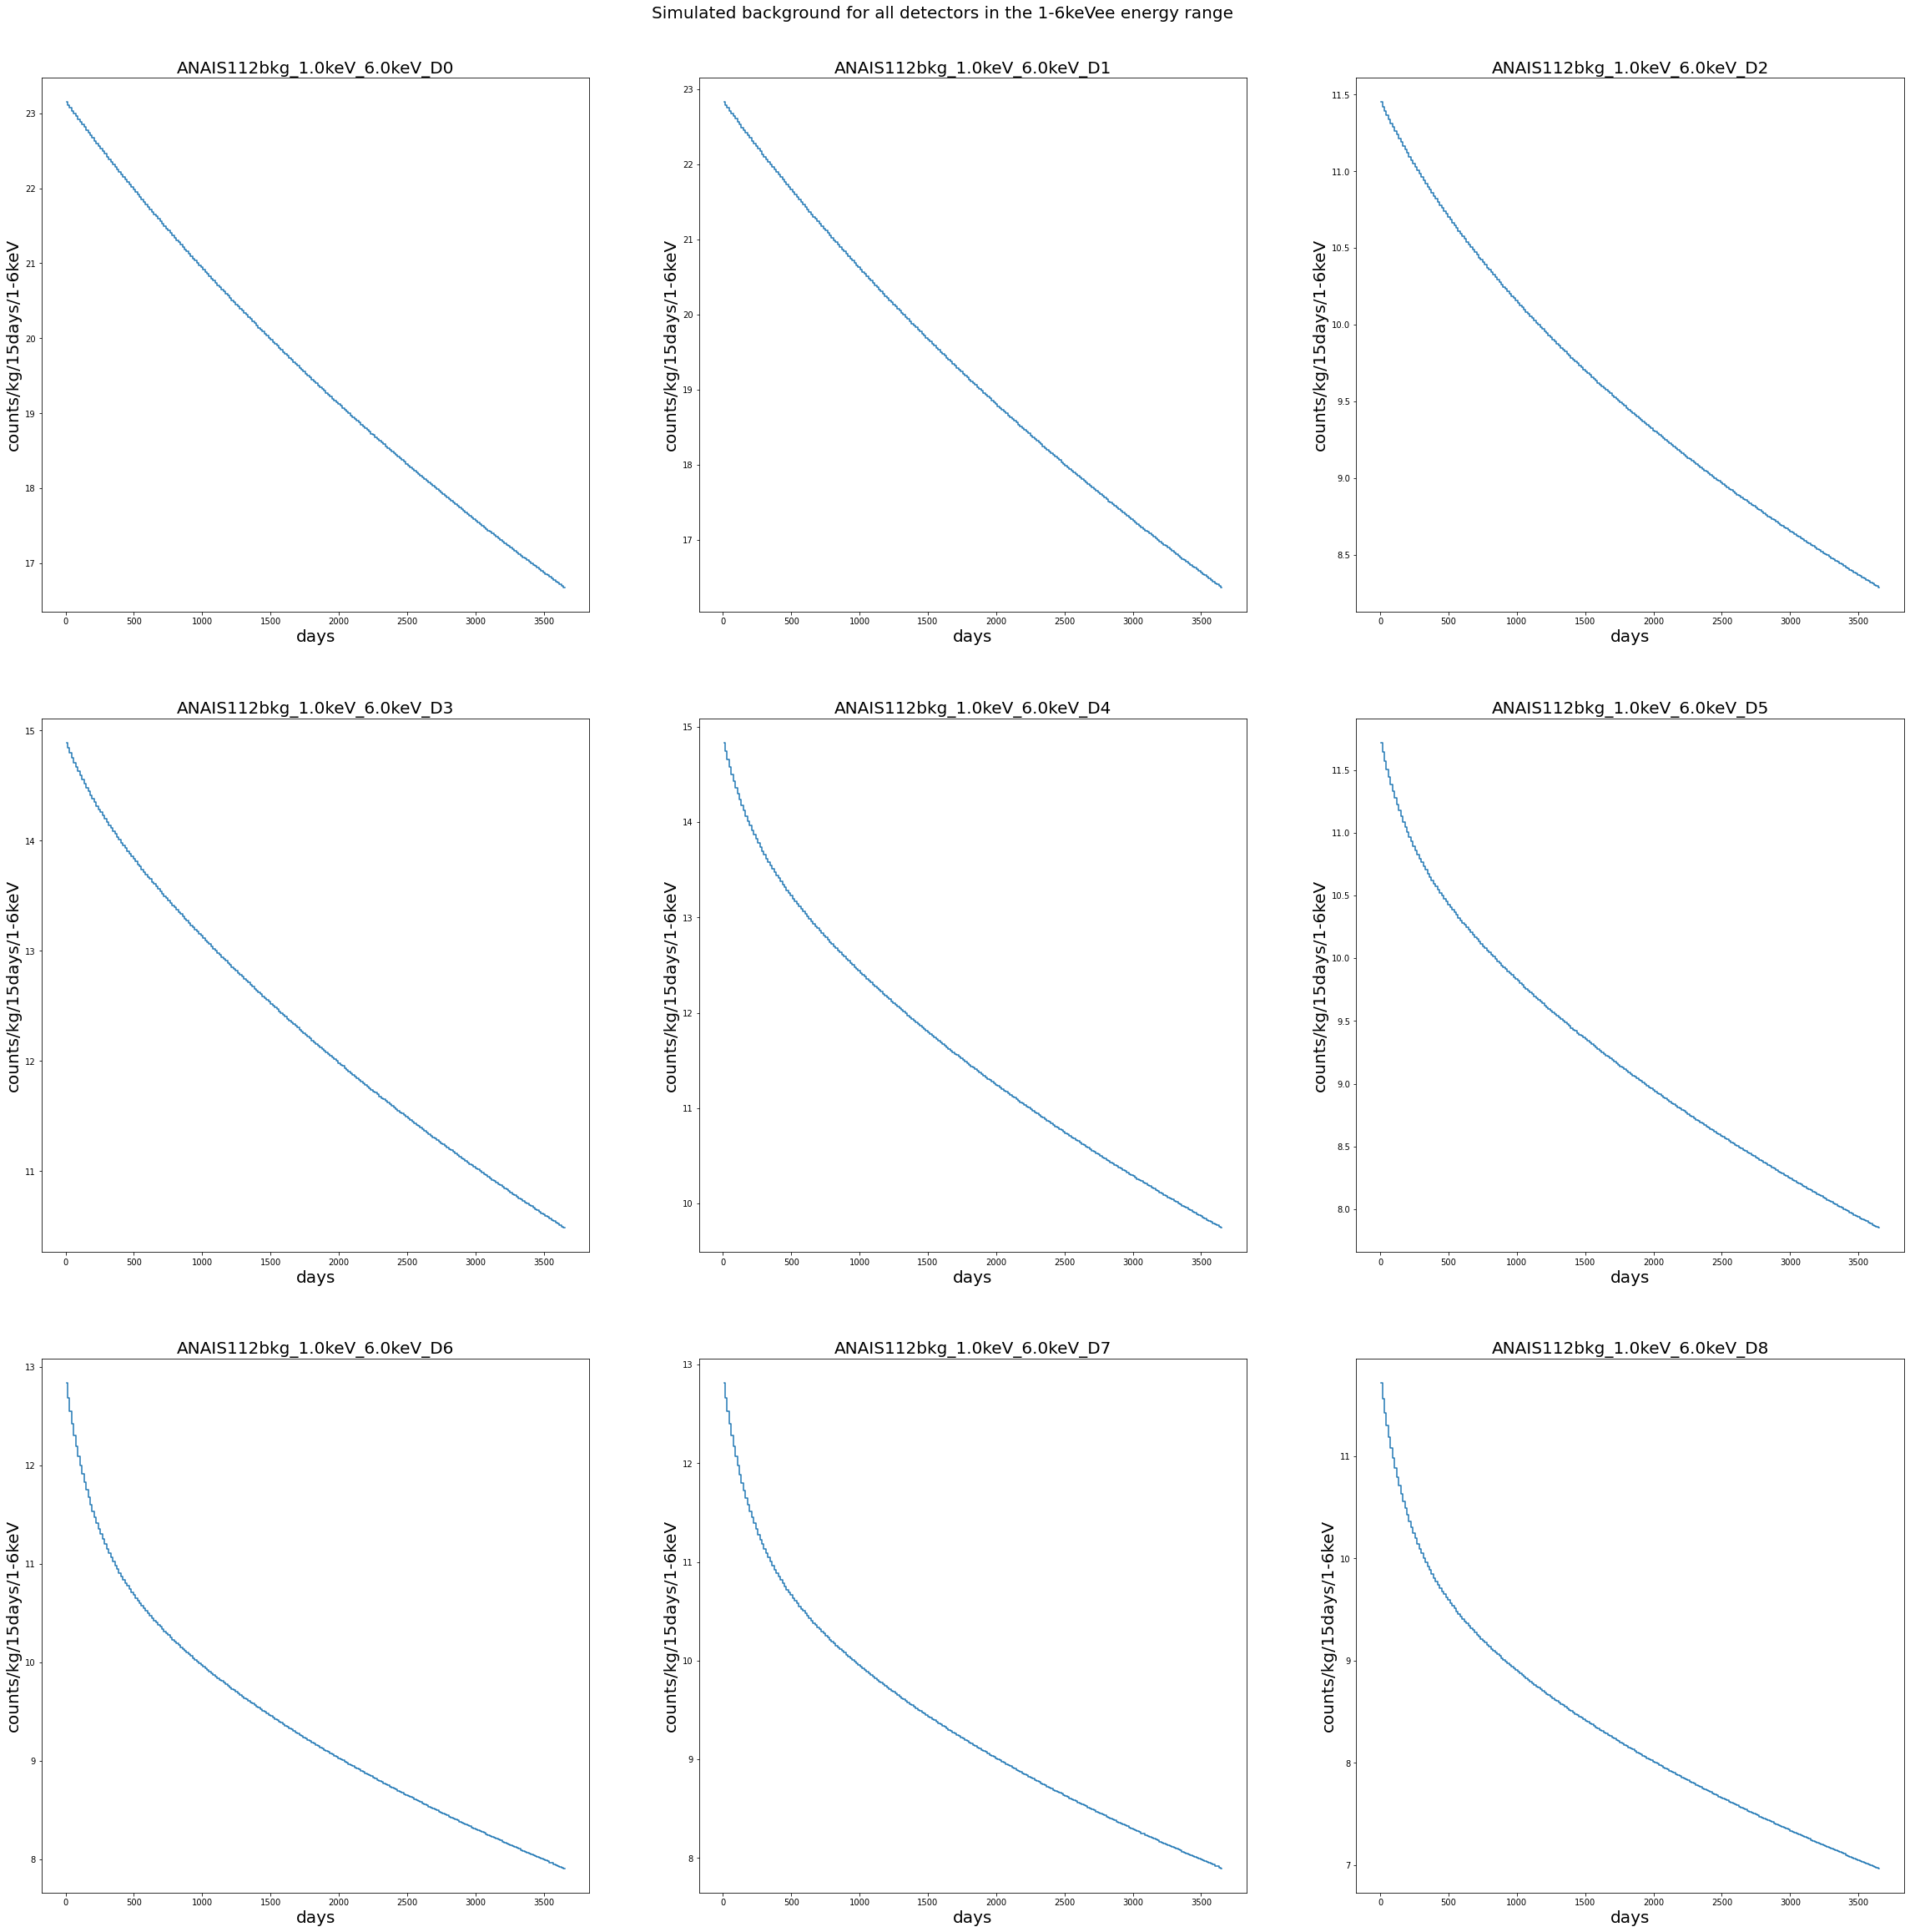

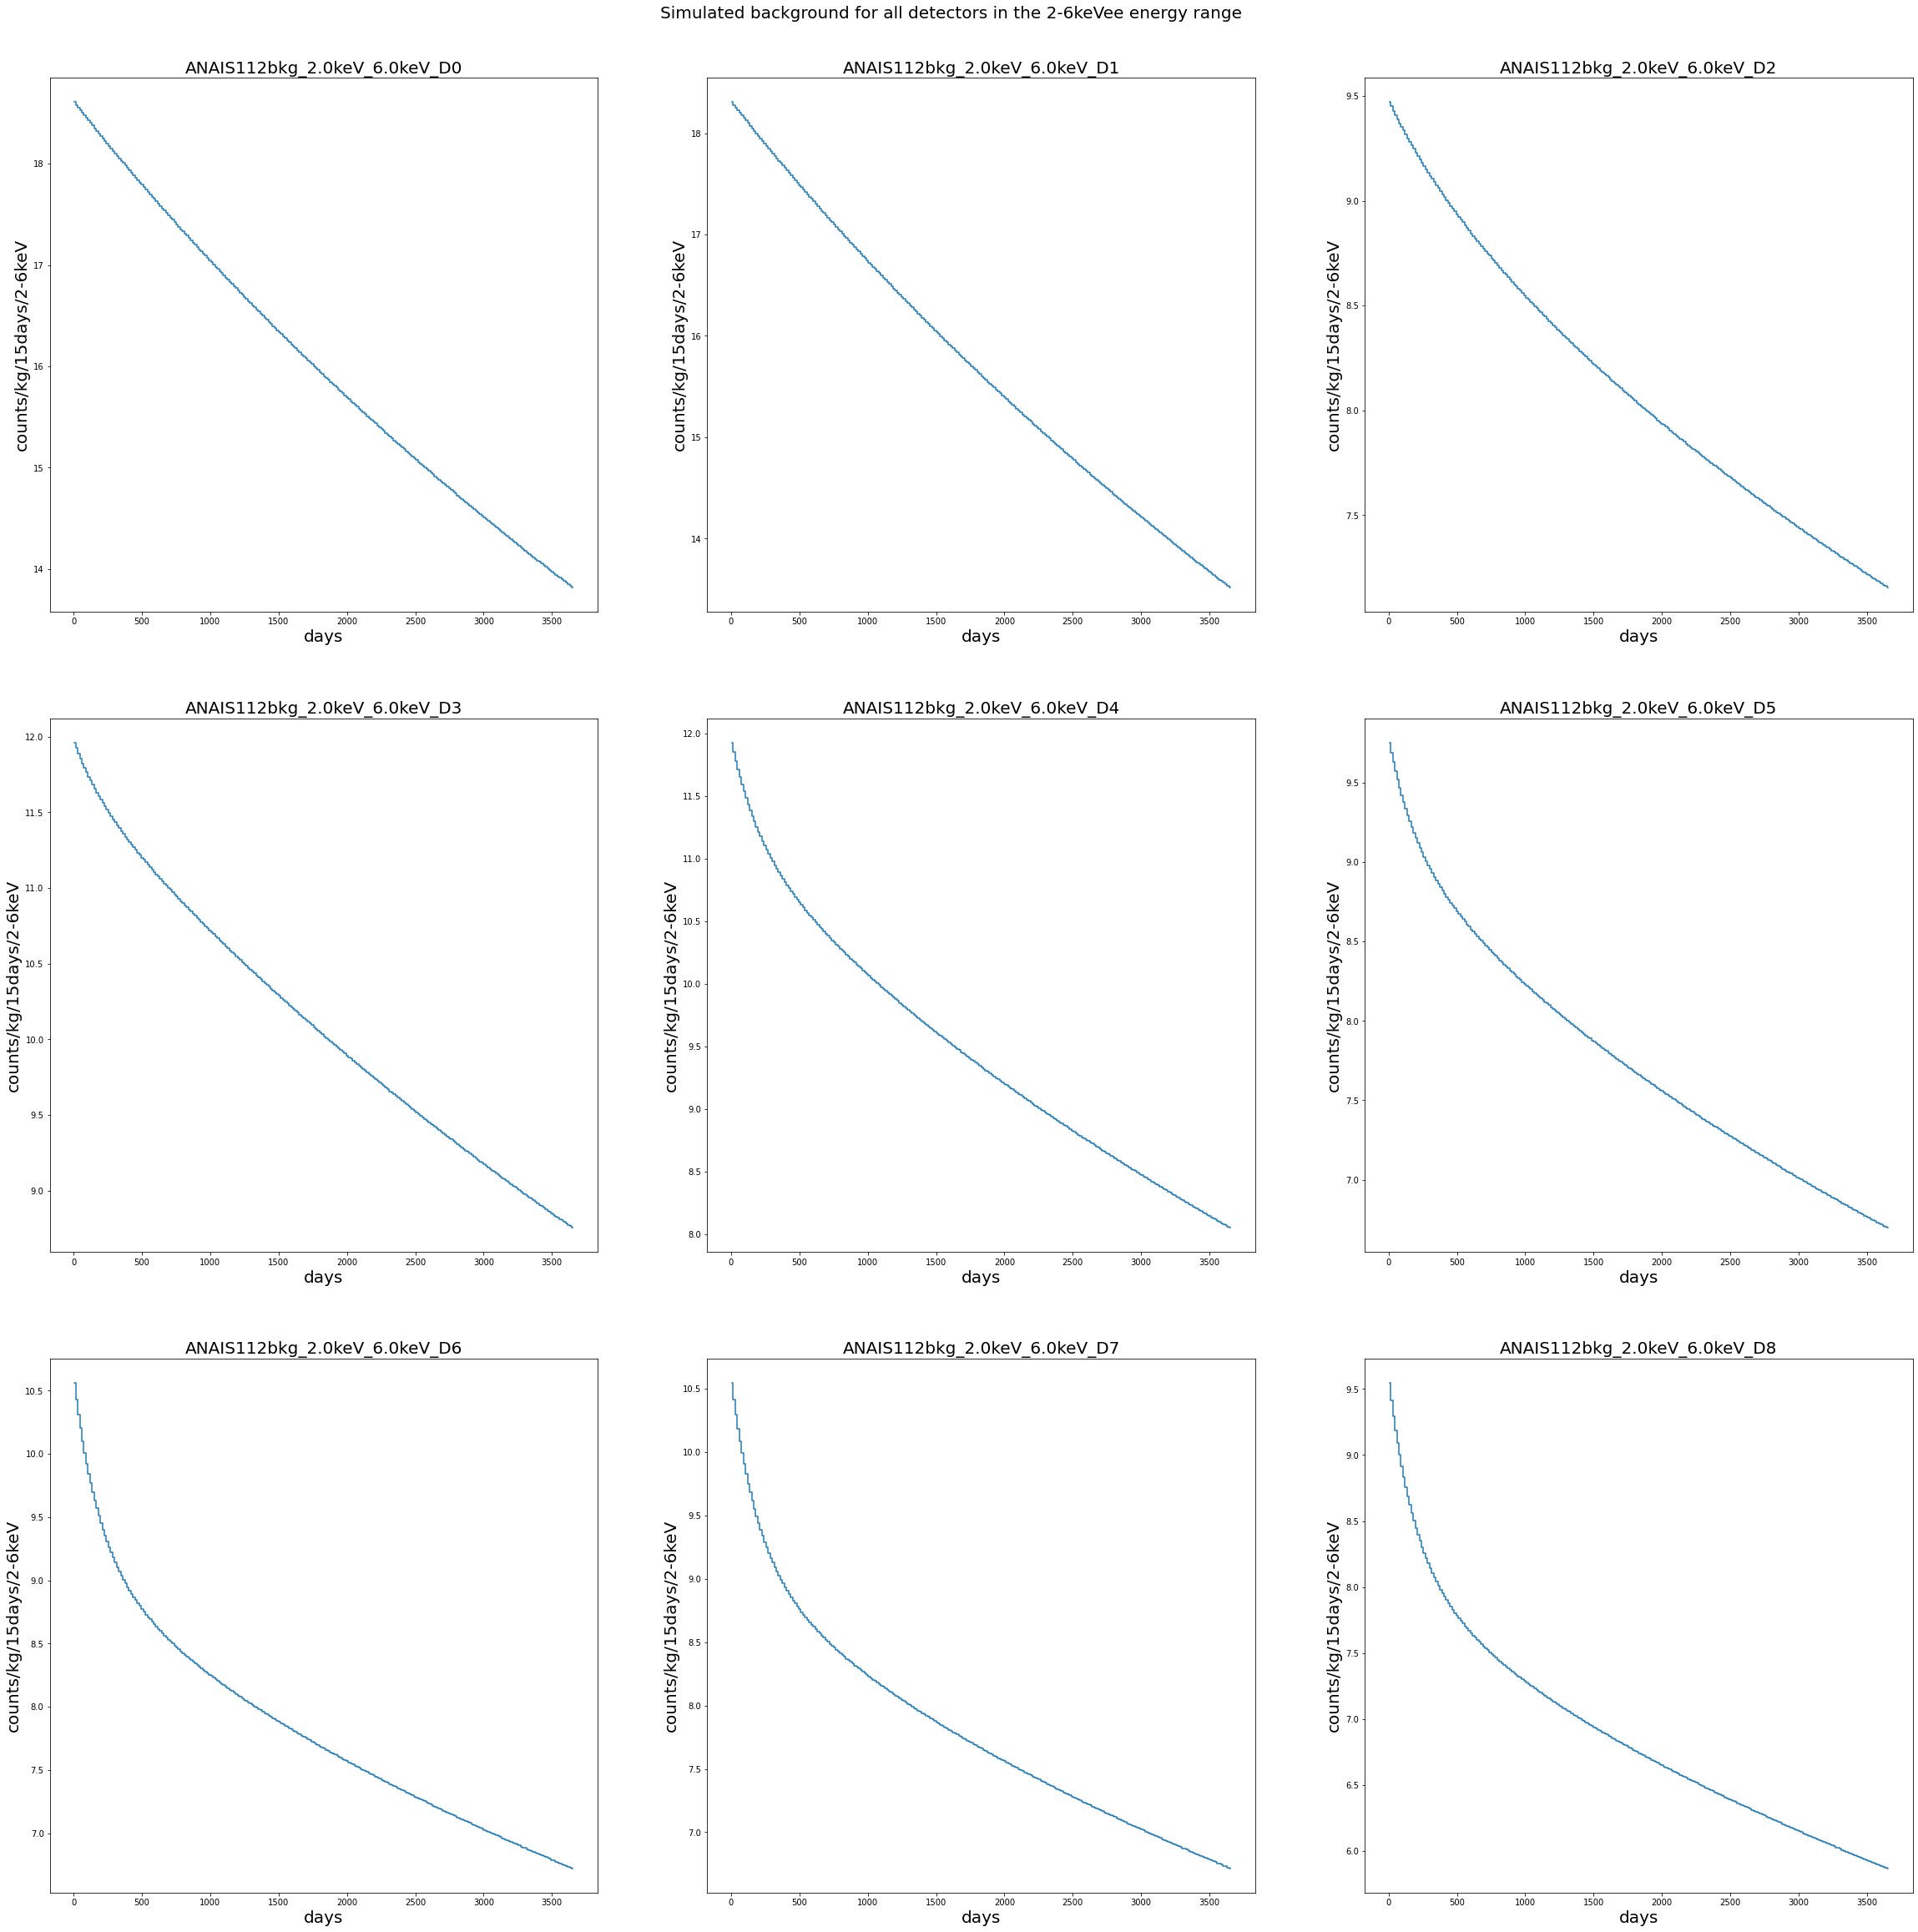

In [5]:
mcdata1_6 = []
mcdata2_6 = []

for i in range(9):
    mcdata1_6.append(np.loadtxt('simulated_background/ANAIS112bkg_M1_1.0keV_6.0keV_D{}.csv'.format(i), delimiter=','))
    mcdata2_6.append(np.loadtxt('simulated_background/ANAIS112bkg_M1_2.0keV_6.0keV_D{}.csv'.format(i), delimiter=','))

fig16, ax16 = plt.subplots(3, 3, figsize=(40,40))

for i in range(9):
    ax16[i//3, i%3].plot(mcdata1_6[i][:,0], mcdata1_6[i][:,1], drawstyle='steps-mid')
    ax16[i//3, i%3].set_xlabel('days', fontsize=20)
    ax16[i//3, i%3].set_ylabel('counts/kg/15days/1-6keV', fontsize=20)
    ax16[i//3, i%3].set_title('ANAIS112bkg_1.0keV_6.0keV_D{}'.format(i), fontsize=20)
    
fig16.suptitle('Simulated background for all detectors in the 1-6keVee energy range', fontsize=20, y=.91 )

fig16, ax16 = plt.subplots(3, 3, figsize=(40,40))

for i in range(9):
    ax16[i//3, i%3].plot(mcdata2_6[i][:,0], mcdata2_6[i][:,1], drawstyle='steps-mid')
    ax16[i//3, i%3].set_xlabel('days', fontsize=20)
    ax16[i//3, i%3].set_ylabel('counts/kg/15days/2-6keV', fontsize=20)
    ax16[i//3, i%3].set_title('ANAIS112bkg_2.0keV_6.0keV_D{}'.format(i), fontsize=20)
    
fig16.suptitle('Simulated background for all detectors in the 2-6keVee energy range', fontsize=20, y=.91 )

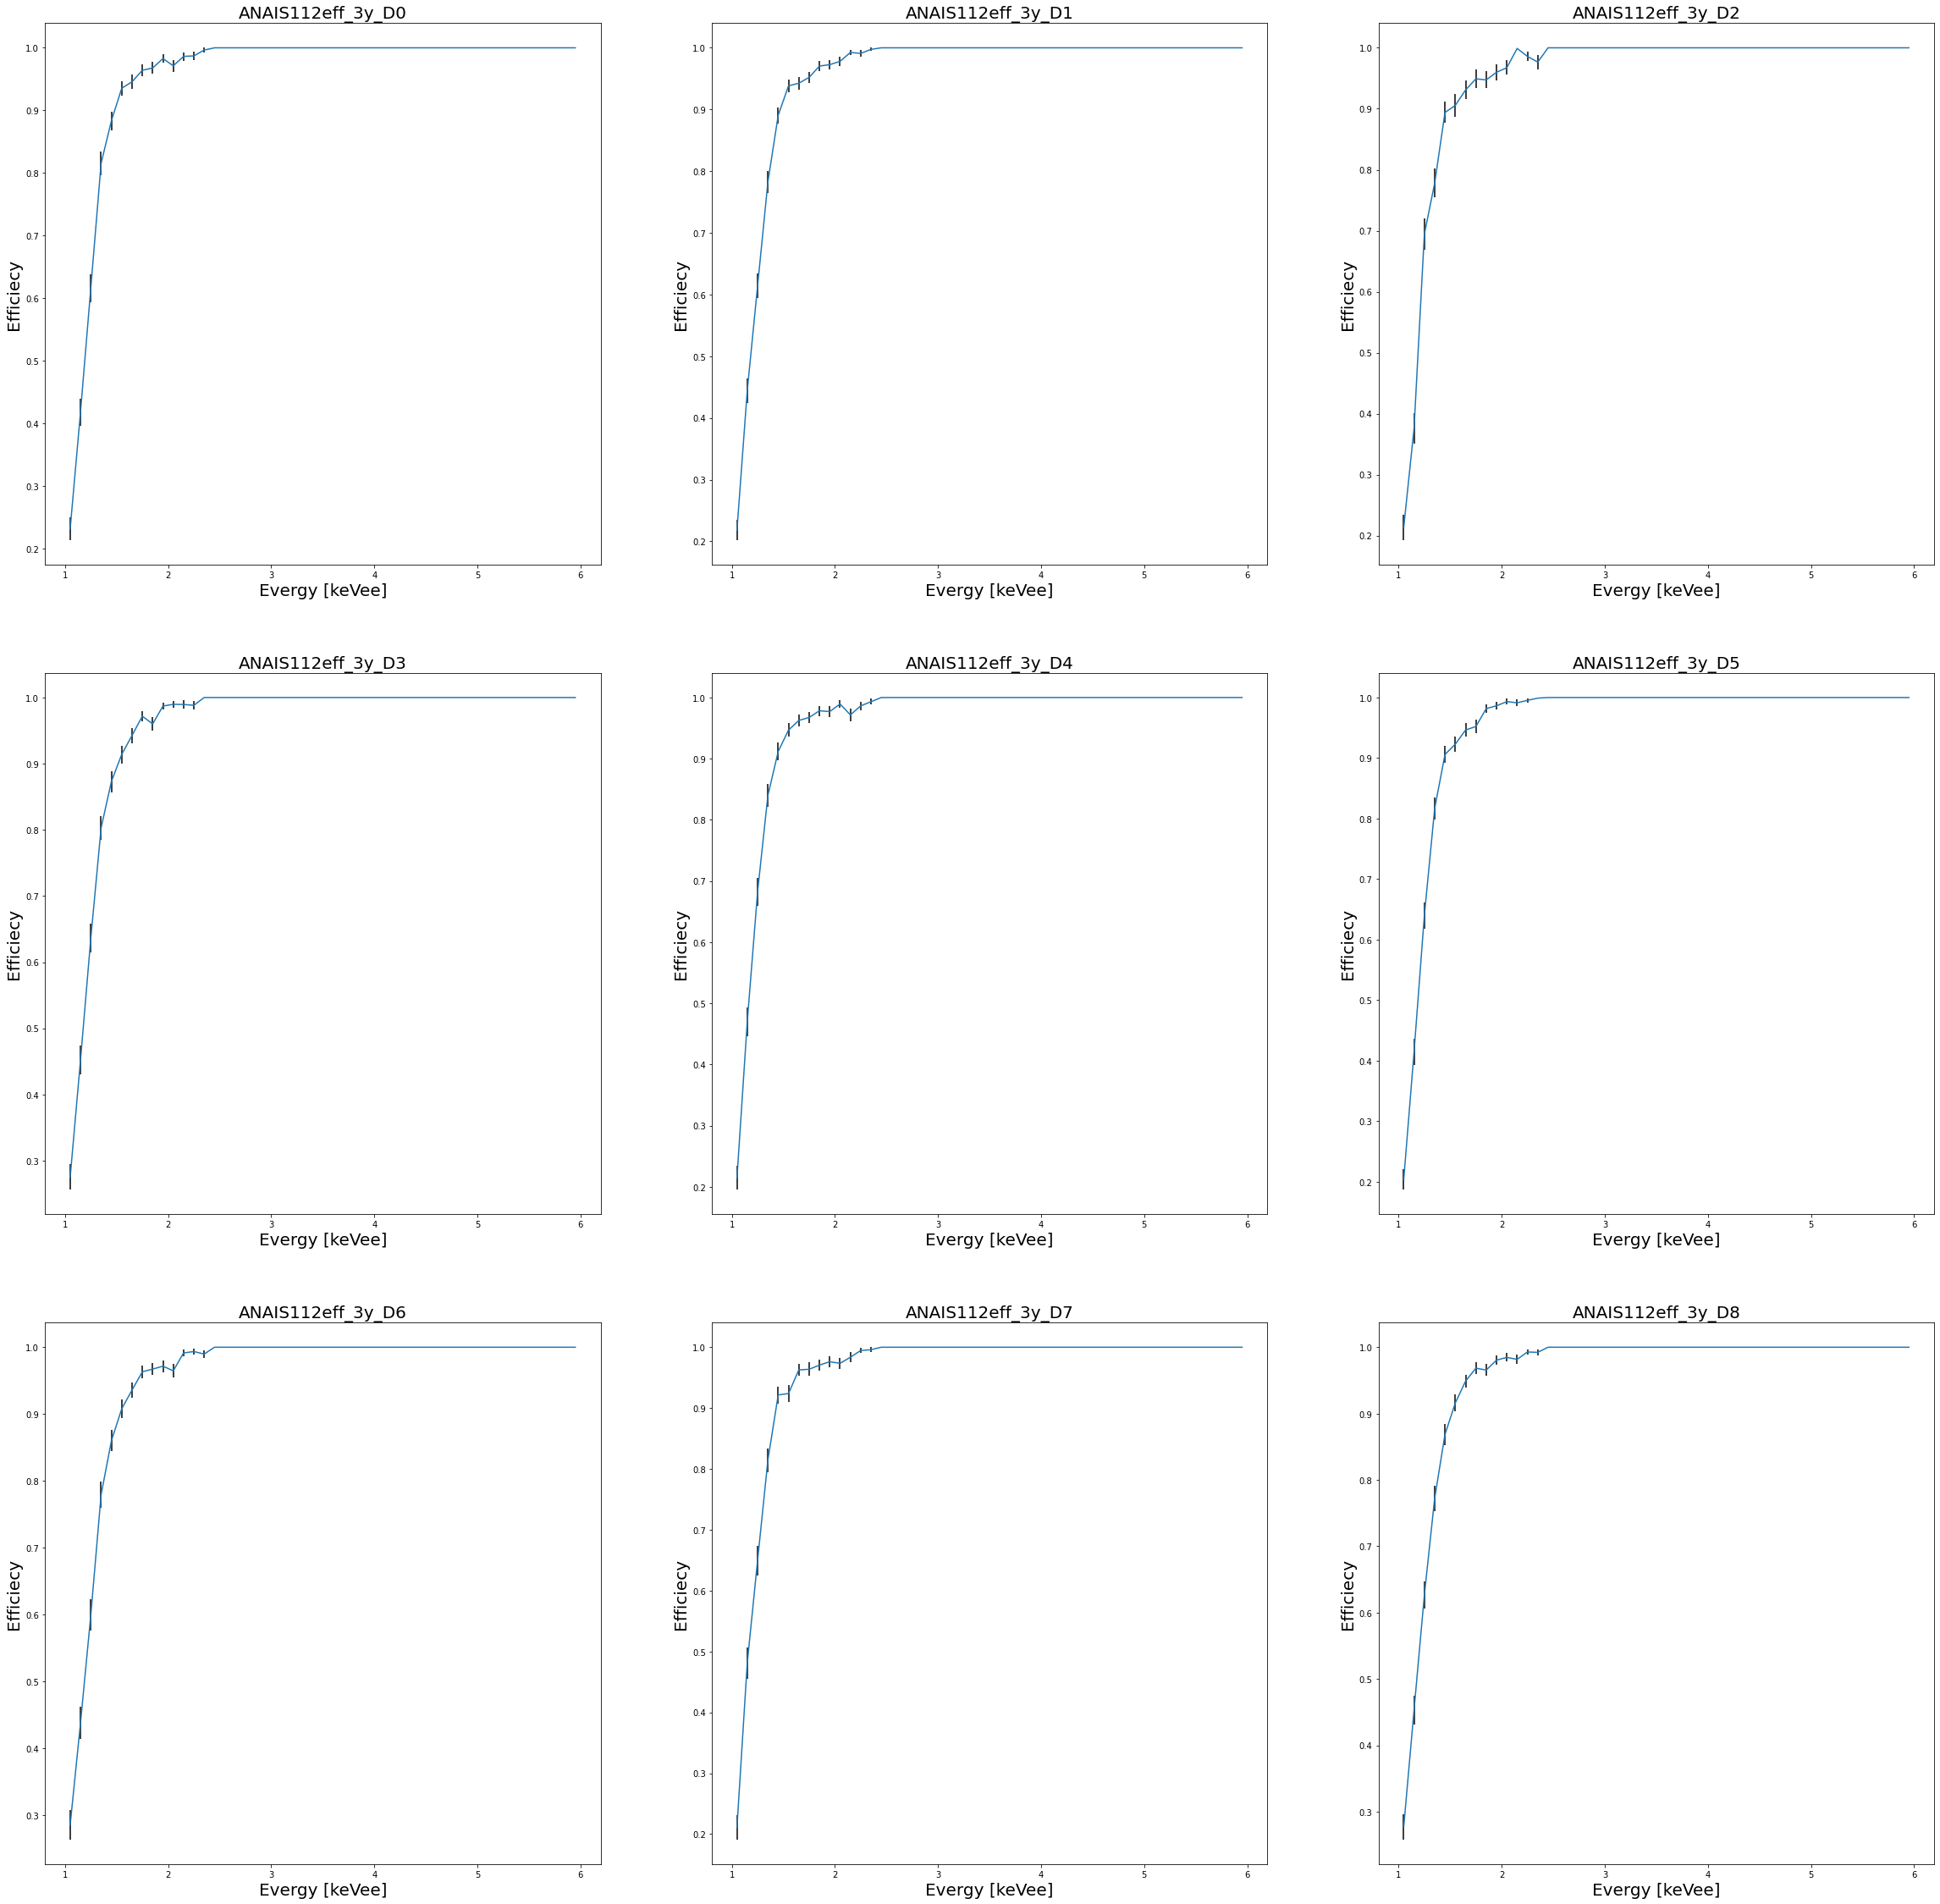

In [6]:
effdata1_6 = []
effdata2_6 = []

for i in range(9):
    effdata1_6.append(np.loadtxt('efficiency/ANAIS112eff_3y_D{}.csv'.format(i), delimiter=','))

fig16, ax16 = plt.subplots(3, 3, figsize=(40,40))

for i in range(9):
    ax16[i//3, i%3].errorbar(effdata1_6[i][:,0], effdata1_6[i][:,1], yerr = effdata1_6[i][:,2], ecolor = 'black')
    ax16[i//3, i%3].set_xlabel('Evergy [keVee]', fontsize=20)
    ax16[i//3, i%3].set_ylabel('Efficiecy', fontsize=20)
    ax16[i//3, i%3].set_title('ANAIS112eff_3y_D{}'.format(i), fontsize=20)

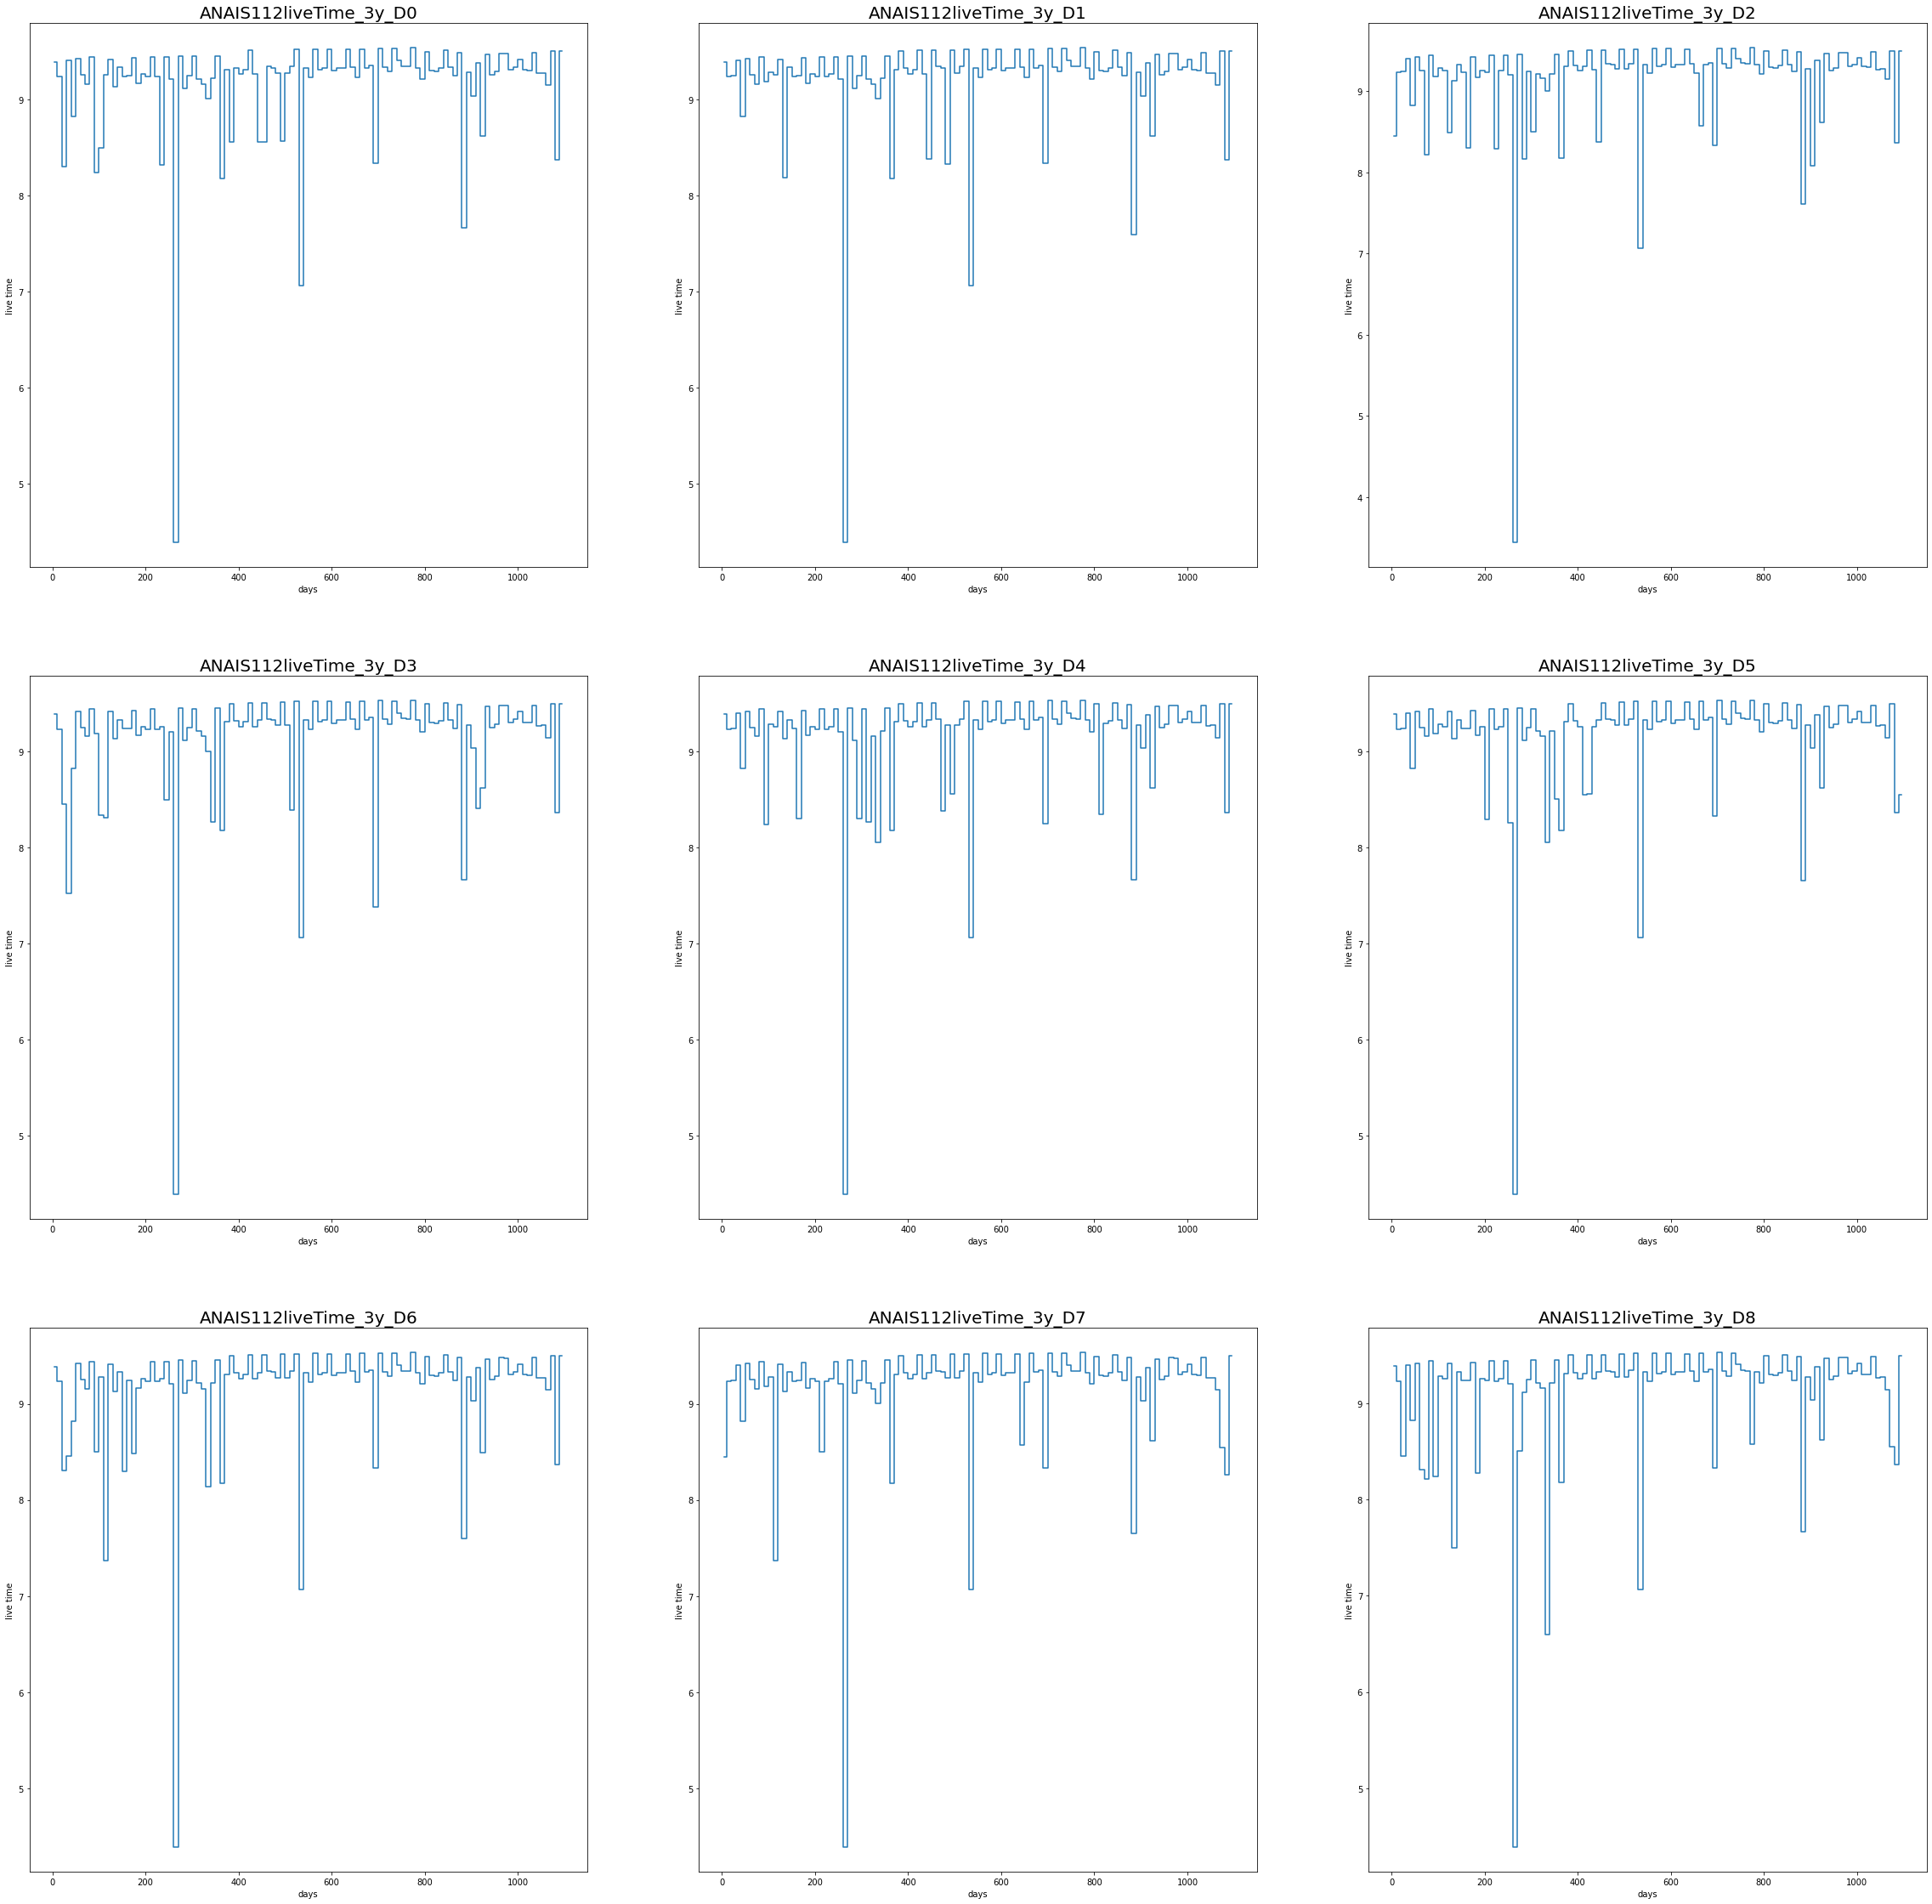

In [8]:
livetime = []
effdata2_6 = []

for i in range(9):
    livetime.append(np.loadtxt('liveTime/ANAIS112liveTime_3y_10days_D{}.csv'.format(i), delimiter=','))

figtime, axtime = plt.subplots(3, 3, figsize=(40,40))

for i in range(9):
    axtime[i//3, i%3].plot(data1_6[0][:,0], livetime[i], drawstyle='steps-mid')
    axtime[i//3, i%3].set_xlabel('days')
    axtime[i//3, i%3].set_ylabel('live time')
    axtime[i//3, i%3].set_title('ANAIS112liveTime_3y_D{}'.format(i), fontsize=20)
    
  
    


#fig, ax = plt.subplots(1, 2, figsize=(30,10))
#ax[1].fill_between(data1_6[0][:,0], data1_6[0][:,0], label = 'real time')
#ax[1].fill_between(data1_6[0][:,0], np.cumsum(livetime), label = 'live time')
#ax[1].set_xlabel('days')
#ax[1].set_ylabel('Cumulative time')
#ax[1].legend()

In [10]:
!root -b -q 'a112modFit.C+(1,1,0)' > a112modFit.log

Info in <TUnixSystem::ACLiC>: creating shared library /media/sf_C_DRIVE/Users/MARIAM/Copy/anais.lnk/ANAIS112/openScience_DMDC/3years_ML/anais112-3years-ml/./a112modFit_C.so
Warning in <ACLiC>: Failed to generate the dependency file for /media/sf_C_DRIVE/Users/MARIAM/Copy/anais.lnk/ANAIS112/openScience_DMDC/3years_ML/anais112-3years-ml/./a112modFit_C.so
Error in <ACLiC>: Dictionary generation failed!


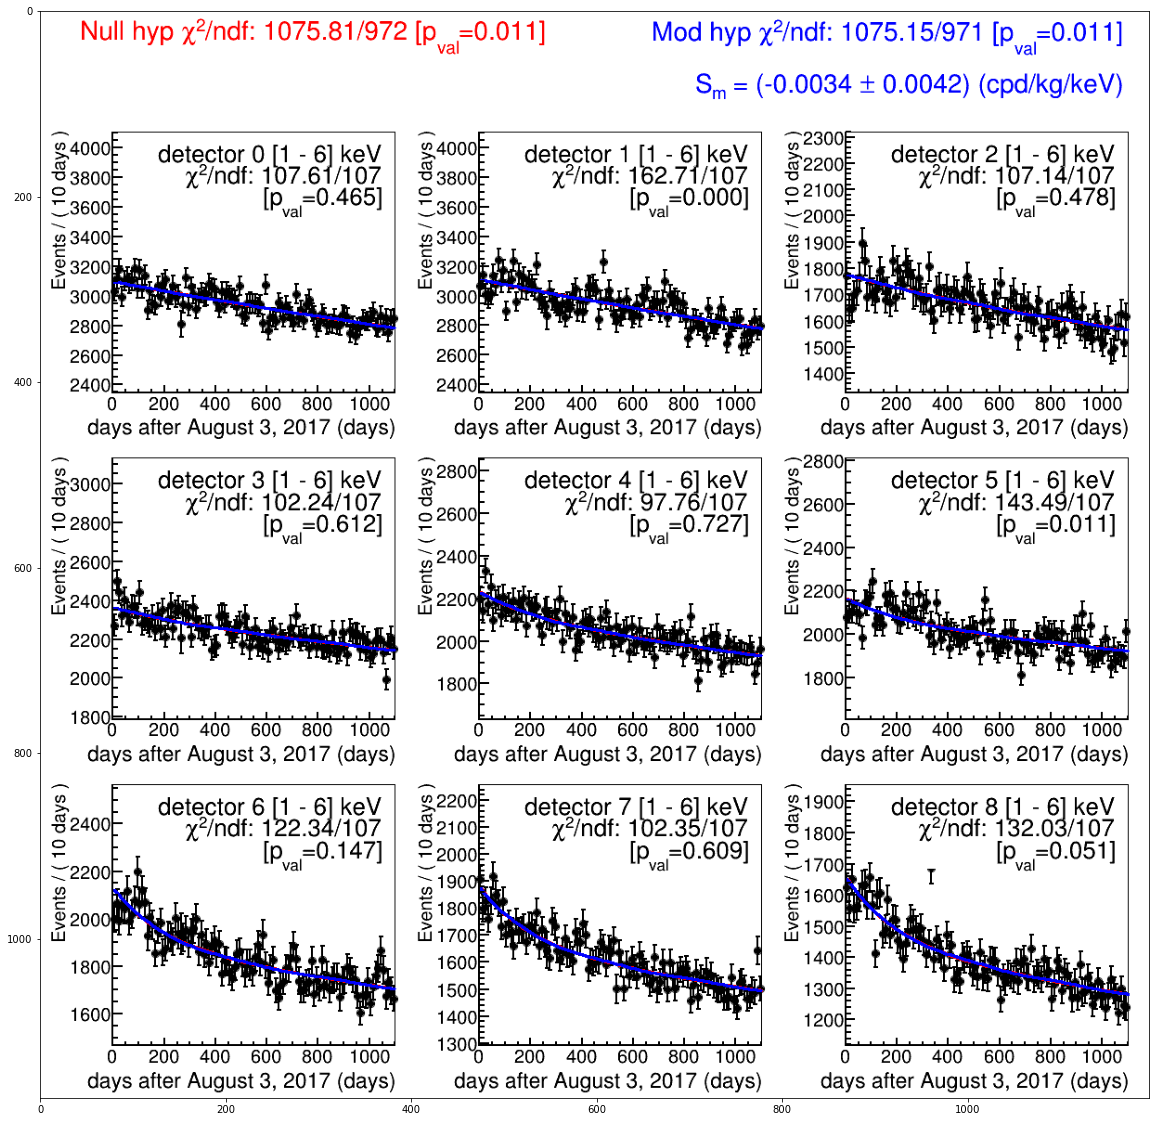

In [8]:
plt.rcParams["figure.figsize"] = (20,20)
img = mpimg.imread('fit_result_simul_1_6_10_global_MC.png')
imgplot = plt.imshow(img)
plt.show()